In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np

Загрузите датасет в pandas DataFrame под названием df.

In [ ]:
# Загрузка датасета 
df = pd.read_csv('../train_dz.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Выполните предварительную обработку данных, выполнив следующие шаги: 

a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). 

b. Проверьте и обработайте любые дублирующиеся строки в датасете. 

c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df=df.drop(columns='Alley')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# Проверка того, в каких столбцах отсутствуют значения
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
# Заполнение пропущенных значений медианным значением столбца
median_age = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(median_age)
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [14]:
duplicates = df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [15]:
duplicates_df = df[duplicates]
duplicates_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [45]:
#заполнения пропущенных значений средними значениями

columns_to_mean = ['LotFrontage', 'MasVnrArea']

for column in columns_to_mean:
    mean_rating = df[column].mean()
    df[column] = df[column].fillna(mean_rating)

In [ ]:
# Замена пустых значений смысловыми 
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['Fence'] = df['Fence'].fillna('No Fence')

# Замена строковых значений числовыми
columns_to_float = ['LotFrontage', 'LotArea','PoolArea','SalePrice']

for column in columns_to_float:
    df[column] = df[column].astype(float)

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,No Pool,No Fence,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,No Pool,No Fence,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,No Pool,No Fence,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0.0,No Pool,No Fence,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,No Pool,No Fence,NaN,0,12,2008,WD,Normal,250000.0


Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:

 a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 
 
 b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 
 
 c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 
 
 d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [46]:
df['SalePrice'].describe().round(2)

count      1460.00
mean     176485.73
std       67897.85
min       34900.00
25%      129900.00
50%      162950.00
75%      213062.50
max      625000.00
Name: SalePrice, dtype: float64

In [ ]:
from scipy import stats

#расчитаем значение стоимости квадратного фута, чтобы проанализировать выбрасы по цене
df['LotPriceArea']=df['SalePrice']/df['LotArea']
median_pa=df['LotPriceArea'].median()
print(median_pa)

# Вычисление Z-score для столбца "SalePrice"
z = np.abs(stats.zscore(df['SalePrice']))

# Установка порогового значения Z-score
threshold = 3

# Замена выбрасов расчитаным медианным значением цены за фут
df.loc[(z > threshold) & (df['LotPriceArea'] > median_pa+5), 'SalePrice'] = df['LotArea']*median_pa

# Выявление выбросов на основе Z-score
outliers = df[z > threshold]
outliers

17.853458182125603


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotPriceArea
161,162,60,RL,110.0,13688.0,Pave,IR1,Lvl,AllPub,Inside,...,No Pool,No Fence,NaN,0,3,2008,WD,Normal,244378.135597,30.135885
185,186,75,RM,90.0,22950.0,Pave,IR2,Lvl,AllPub,Inside,...,No Pool,GdPrv,NaN,0,6,2006,WD,Normal,475000.000000,20.697168
231,232,60,RL,174.0,15138.0,Pave,IR1,Lvl,AllPub,Inside,...,No Pool,No Fence,NaN,0,7,2009,WD,Normal,270265.649961,26.621747
278,279,20,RL,107.0,14450.0,Pave,Reg,Lvl,AllPub,Inside,...,No Pool,No Fence,NaN,0,5,2007,New,Partial,257982.470732,28.740346
349,350,60,RL,56.0,20431.0,Pave,IR2,Lvl,AllPub,Inside,...,No Pool,No Fence,NaN,0,4,2006,New,Partial,437154.000000,21.396603
378,379,20,RL,88.0,11394.0,Pave,Reg,Lvl,AllPub,Corner,...,No Pool,No Fence,NaN,0,6,2010,New,Partial,203422.302527,34.617518
515,516,20,RL,94.0,12220.0,Pave,Reg,Lvl,AllPub,Inside,...,No Pool,No Fence,NaN,0,9,2009,New,Partial,218169.258986,32.967349
661,662,60,RL,52.0,46589.0,Pave,IR2,Lvl,AllPub,CulDSac,...,No Pool,No Fence,NaN,0,7,2009,WD,Normal,402000.000000,8.628646
664,665,20,RL,49.0,20896.0,Pave,IR2,Lvl,AllPub,CulDSac,...,No Pool,No Fence,NaN,0,1,2006,New,Partial,423000.000000,20.243109
688,689,20,RL,60.0,8089.0,Pave,Reg,HLS,AllPub,Inside,...,No Pool,No Fence,NaN,0,10,2007,New,Partial,144416.623235,48.460873


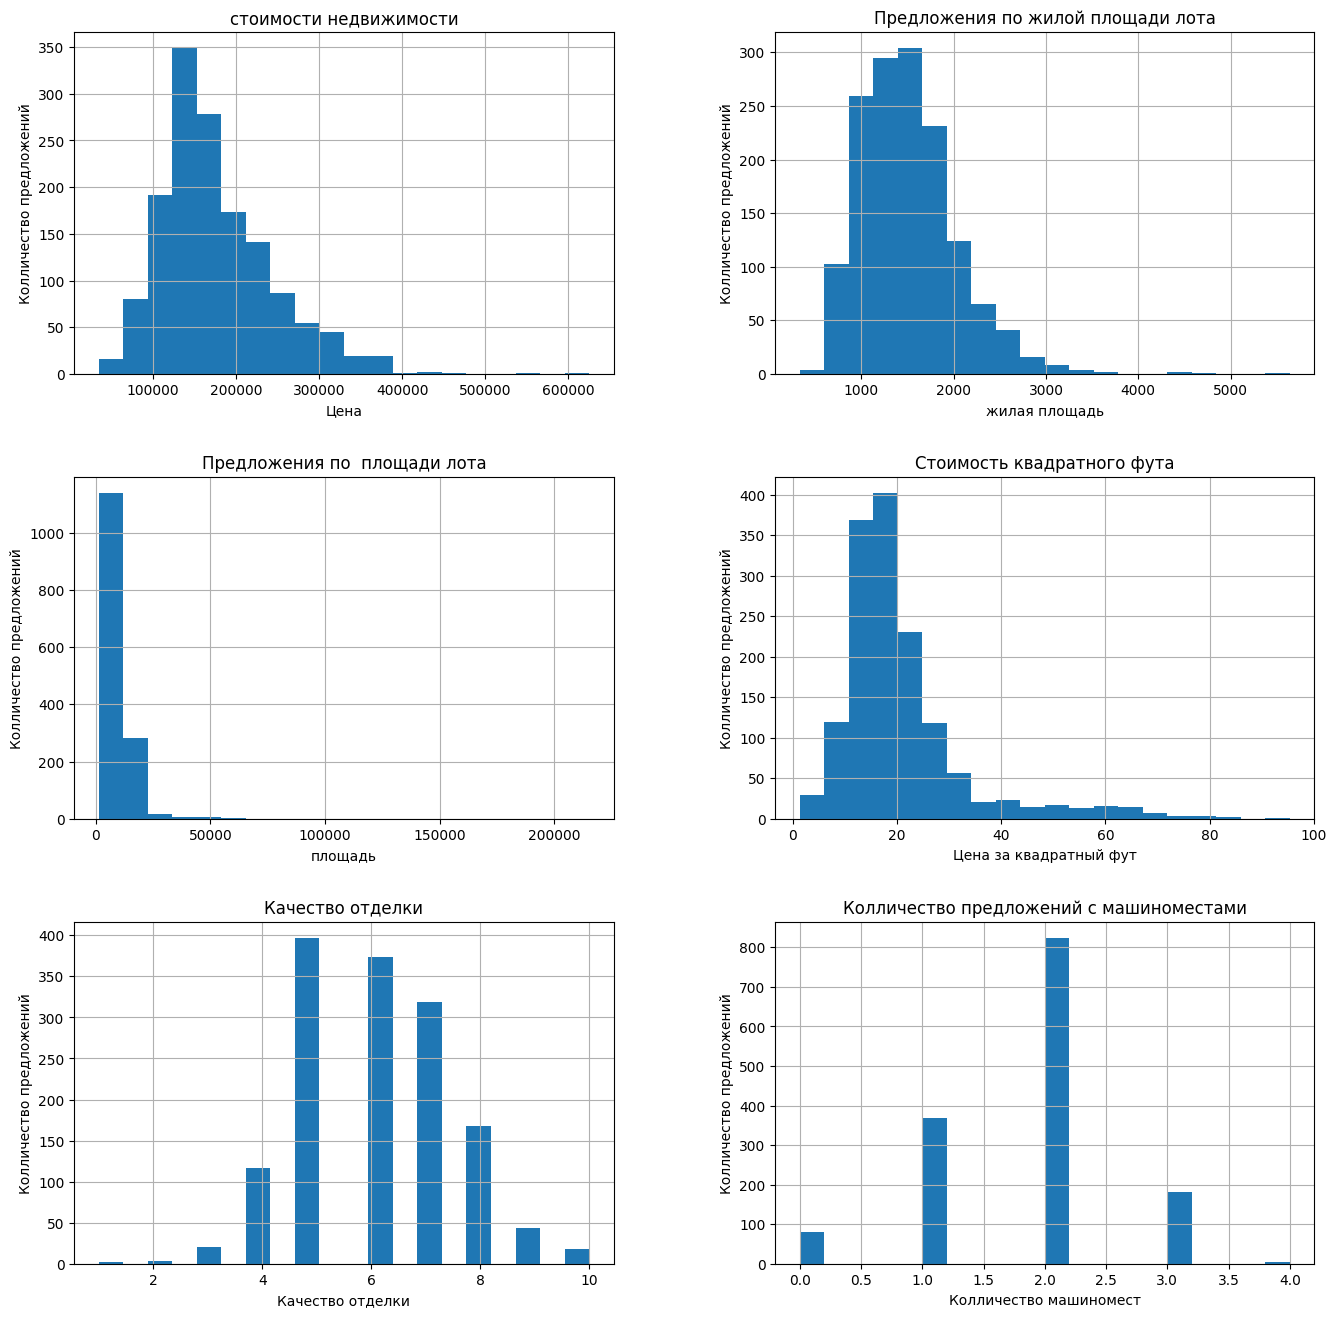

In [41]:
df_features = df[['SalePrice','GrLivArea','LotArea','LotPriceArea','OverallQual','GarageCars']]
axarr=df_features.hist(figsize=(16, 16), bins=20, grid=True).flatten()
axarr[0].set_xlabel('Цена')
axarr[0].set_title('стоимости недвижимости')
axarr[1].set_xlabel('жилая площадь')
axarr[1].set_title('Предложения по жилой площади лота')
axarr[2].set_xlabel('площадь')
axarr[2].set_title('Предложения по  площади лота')
axarr[3].set_xlabel('Цена за квадратный фут')
axarr[3].set_title('Стоимость квадратного фута')
axarr[4].set_xlabel('Качество отделки')
axarr[4].set_title('Качество отделки')
axarr[5].set_xlabel('Колличество машиномест')
axarr[5].set_title('Колличество предложений с машиноместами')

for ax in axarr:
    ax.set_ylabel('Колличество предложений')

In [47]:
impotant_variables = ['OverallQual', 'GrLivArea', 'GarageCars']
df[impotant_variables].describe().round(2)

,OverallQual,GrLivArea,GarageCars
count,1460.00,1460.00,1460.00
mean,6.10,1515.46,1.77
std,1.38,525.48,0.75
min,1.00,334.00,0.00
25%,5.00,1129.50,1.00
50%,6.00,1464.00,2.00
75%,7.00,1776.75,2.00
max,10.00,5642.00,4.00


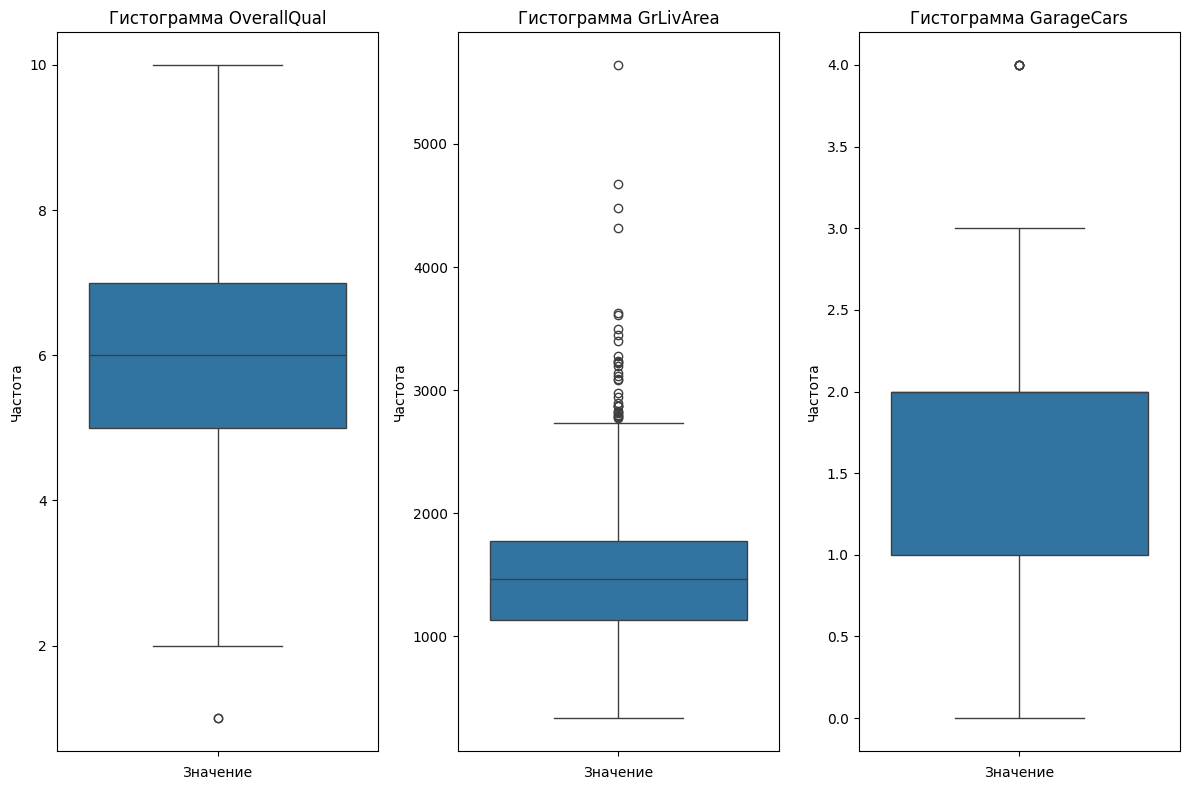

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# Отрисовка гистограммы распределения важных переменных

num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(impotant_variables):
    sns.boxplot(data=df, y = col, ax=axes[i])
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Выполните проектирование признаков путем реализации следующих преобразований:

 a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 
 
 b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик

In [53]:
# Применяем one-hot encoding 
one_hot_encoded_df = pd.get_dummies(df, columns=['CentralAir'])
one_hot_encoded_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotPriceArea,CentralAir_N,CentralAir_Y
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500.0,24.674556,False,True
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500.0,18.906250,False,True
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500.0,19.866667,False,True
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000.0,14.659686,False,True
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000.0,17.531557,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,8,2007,WD,Normal,175000.0,22.104332,False,True
1456,1457,20,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2010,WD,Normal,210000.0,15.939279,False,True
1457,1458,70,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,Shed,2500,5,2010,WD,Normal,266500.0,29.473568,False,True
1458,1459,20,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,4,2010,WD,Normal,142125.0,14.626428,False,True


In [57]:
# Выполнение label encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['BldgType_int'] = le.fit_transform(df['BldgType'].astype(str))

In [62]:
df[['BldgType','BldgType_int']].head(20)

,BldgType,BldgType_int
0,1Fam,0
1,1Fam,0
2,1Fam,0
3,1Fam,0
4,1Fam,0
5,1Fam,0
6,1Fam,0
7,1Fam,0
8,1Fam,0
9,2fmCon,1


In [ ]:
#новое поле соединением двух
df['MoYar'] = df['MoSold'].map(str) + '.' + df['YrSold'].map(str) 
df['MoYar']

0        2.2008
1        5.2007
2        9.2008
3        2.2006
4       12.2008
         ...   
1455     8.2007
1456     2.2010
1457     5.2010
1458     4.2010
1459     6.2008
Name: MoYar, Length: 1460, dtype: object

Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [68]:
df.to_csv('cleaned_house_prices.csv', index=False)